In [1]:
import random
import math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

(a)

In [2]:
def generate_data(n, lower=0, upper=1):
  x = [random.uniform(lower, upper) for _ in range(n)]
  y = [math.sin(10*math.pi*(i**4)) for i in x]
  return np.array(x), np.array(y)

(b)

In [3]:
class mynet(nn.Module):
  def __init__(self):
    super(mynet, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 1),
        nn.BatchNorm1d(1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.BatchNorm1d(1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.BatchNorm1d(1),
        nn.ReLU(),
    )
  
  def forward(self, x):
    return self.layers(x)


In [4]:
net = mynet()
lr = 0.01
rho = 0.9
wd = 0.001
loss_fct = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=rho, weight_decay=wd)

In [13]:
# evaluate the quantity
def eval_in(net, n, epochs):
  # generate a dataset
  x, y = generate_data(n)
  max_eval = 0
  dataset = torch.from_numpy(y), torch.from_numpy(x)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  loss_fct = nn.L1Loss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=rho, weight_decay=wd)
  net.train()
  for epoch in range(epochs):
    for i, data in enumerate(trainloader, 0):
      inputs, targets = data
      targets = targets.reshape((targets.shape[0], 1)).float()
      inputs = inputs.reshape((inputs.shape[0], 1)).float()
      optimizer.zero_grad()
      output = net(inputs)
      loss = loss_fct(output, targets)
      loss.backward()
      optimizer.step()
  net.eval()
  for i, data in enumerate(trainloader, 0):
      inputs, targets = data
      targets = targets.reshape((targets.shape[0], 1)).float()
      inputs = inputs.reshape((inputs.shape[0], 1)).float()
      output = net(inputs)
      if max(abs(targets-output)).item() > max_eval:
        max_eval = max(abs(targets-output)).item()
  return max_eval

def eval_out(net, n):
  # generate a dataset
  x, y = generate_data(n)
  max_eval = 0
  dataset = torch.from_numpy(y), torch.from_numpy(x)
  testloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  for i, data in enumerate(testloader, 0):
      inputs, targets = data
      targets = targets.reshape((targets.shape[0], 1)).float()
      inputs = inputs.reshape((inputs.shape[0], 1)).float()
      output = net(inputs)
      if max(abs(targets-output)).item() > max_eval:
        max_eval = max(abs(targets-output)).item()
  return max_eval



(c)

In [14]:
lr = 0.01
rho = 0.75
wd = 0.001
loss_fct = nn.L1Loss()

In [15]:
# create training datasets
ns = np.logspace(1, 3, 20).astype(int)
in_devs = []
out_devs = []
in_means = []
in_stds = []
out_means = []
out_stds = []
for n in ns:
  # create 5 training datasets
  for i in range(5):
    net = mynet()
    in_dev = eval_in(net, n, 100)
    in_dev
    in_devs.append(in_dev)
    out_dev = eval_out(net, n)
    out_devs.append(out_dev)
  in_means.append(np.mean(in_devs))
  out_means.append(np.mean(out_devs))
  in_stds.append(np.std(in_devs))
  out_stds.append(np.std(out_devs))

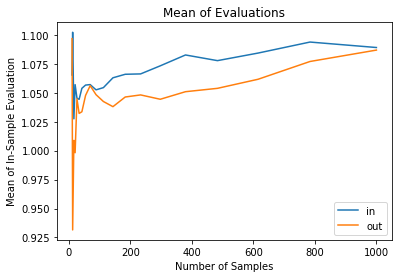

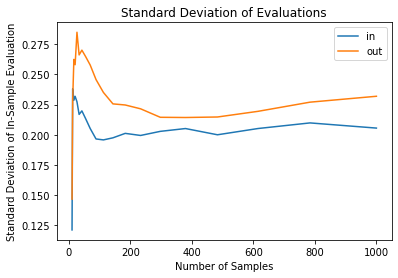

<Figure size 432x288 with 0 Axes>

In [16]:
# plot

plt.plot(ns, in_means, label='in')
plt.plot(ns, out_means, label='out')
plt.ylabel('Mean of In-Sample Evaluation')
plt.xlabel('Number of Samples')
plt.legend()
plt.title('Mean of Evaluations')
plt.figure()
plt.plot(ns, in_stds, label='in')
plt.plot(ns, out_stds, label='out')
plt.ylabel('Standard Deviation of In-Sample Evaluation')
plt.xlabel('Number of Samples')
plt.legend()
plt.title('Standard Deviation of Evaluations')
plt.show()
plt.savefig('3c.pdf')